<a href="https://colab.research.google.com/github/AbdullahF1111/melbourne-house-price-prediction_analysis/blob/main/melbourne_house_price_analysis_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 Melbourne Housing Price Analysis

A comprehensive project for analyzing Melbourne housing prices using Python, including:
- Exploratory Data Analysis (EDA)
- Data cleaning and processing
- Machine Learning modeling
- Price prediction and model evaluation

## 📁 Project Structure

**1. Environment Setup and Data Import**

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from google.colab import drive

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/melb_data.csv (1).zip"
df = pd.read_csv(file_path)

print(f"\u2705 Data loaded successfully. Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Data loaded successfully. Rows: 13580, Columns: 21


**2. Exploratory Data Analysis (EDA)**

In [2]:
# 1. Basic Information (Concise)
print("\n\U0001F4C4 Dataset Dimensions:")
print(f"Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")

print("\n\U0001F4C4 Data Types Overview:")
print(df.dtypes.value_counts().to_frame('Count'))

# 2. Key Statistics (Visual Format)
print("\n\U0001F4CA Top 5 Numerical Stats:")
display(df.describe().T.head(5))

print("\n\U0001F4CA Categorical Summary:")
print(df.select_dtypes(include='object').nunique().to_frame('Unique Values'))


📄 Dataset Dimensions:
Rows: 13,580 | Columns: 21

📄 Data Types Overview:
         Count
float64     12
object       8
int64        1

📊 Top 5 Numerical Stats:


,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.0,2.0,3.0,3.0,10.0
Price,13580.0,1.075684e+06,639310.724296,85000.0,650000.0,903000.0,1330000.0,9000000.0
Distance,13580.0,1.013778e+01,5.868725,0.0,6.1,9.2,13.0,48.1
Postcode,13580.0,3.105302e+03,90.676964,3000.0,3044.0,3084.0,3148.0,3977.0
Bedroom2,13580.0,2.914728e+00,0.965921,0.0,2.0,3.0,3.0,20.0



📊 Categorical Summary:
             Unique Values
Suburb                 314
Address              13378
Type                     3
Method                   5
SellerG                268
Date                    58
CouncilArea             33
Regionname               8


In [3]:
# 3. Sample Data (Interactive)
from IPython.display import display
print("\n\U0001F50D Sample Data (First 3 rows):")
display(df.head(3).style.set_caption("Sample Records").set_table_styles(
    [{'selector': 'caption', # Wrapped the dictionary in a list
     'props': [('font-size', '14px'),
               ('font-weight', 'bold')]}] # Wrapped the dictionary in a list
))


🔍 Sample Data (First 3 rows):


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.000000,S,Biggin,3/12/2016,2.500000,3067.000000,2.000000,1.000000,1.000000,202.000000,nan,nan,Yarra,-37.799600,144.998400,Northern Metropolitan,4019.000000
1,Abbotsford,25 Bloomburg St,2,h,1035000.000000,S,Biggin,4/02/2016,2.500000,3067.000000,2.000000,1.000000,0.000000,156.000000,79.000000,1900.000000,Yarra,-37.807900,144.993400,Northern Metropolitan,4019.000000
2,Abbotsford,5 Charles St,3,h,1465000.000000,SP,Biggin,4/03/2017,2.500000,3067.000000,3.000000,2.000000,0.000000,134.000000,150.000000,1900.000000,Yarra,-37.809300,144.994400,Northern Metropolitan,4019.000000



🚫 Missing Values Analysis:


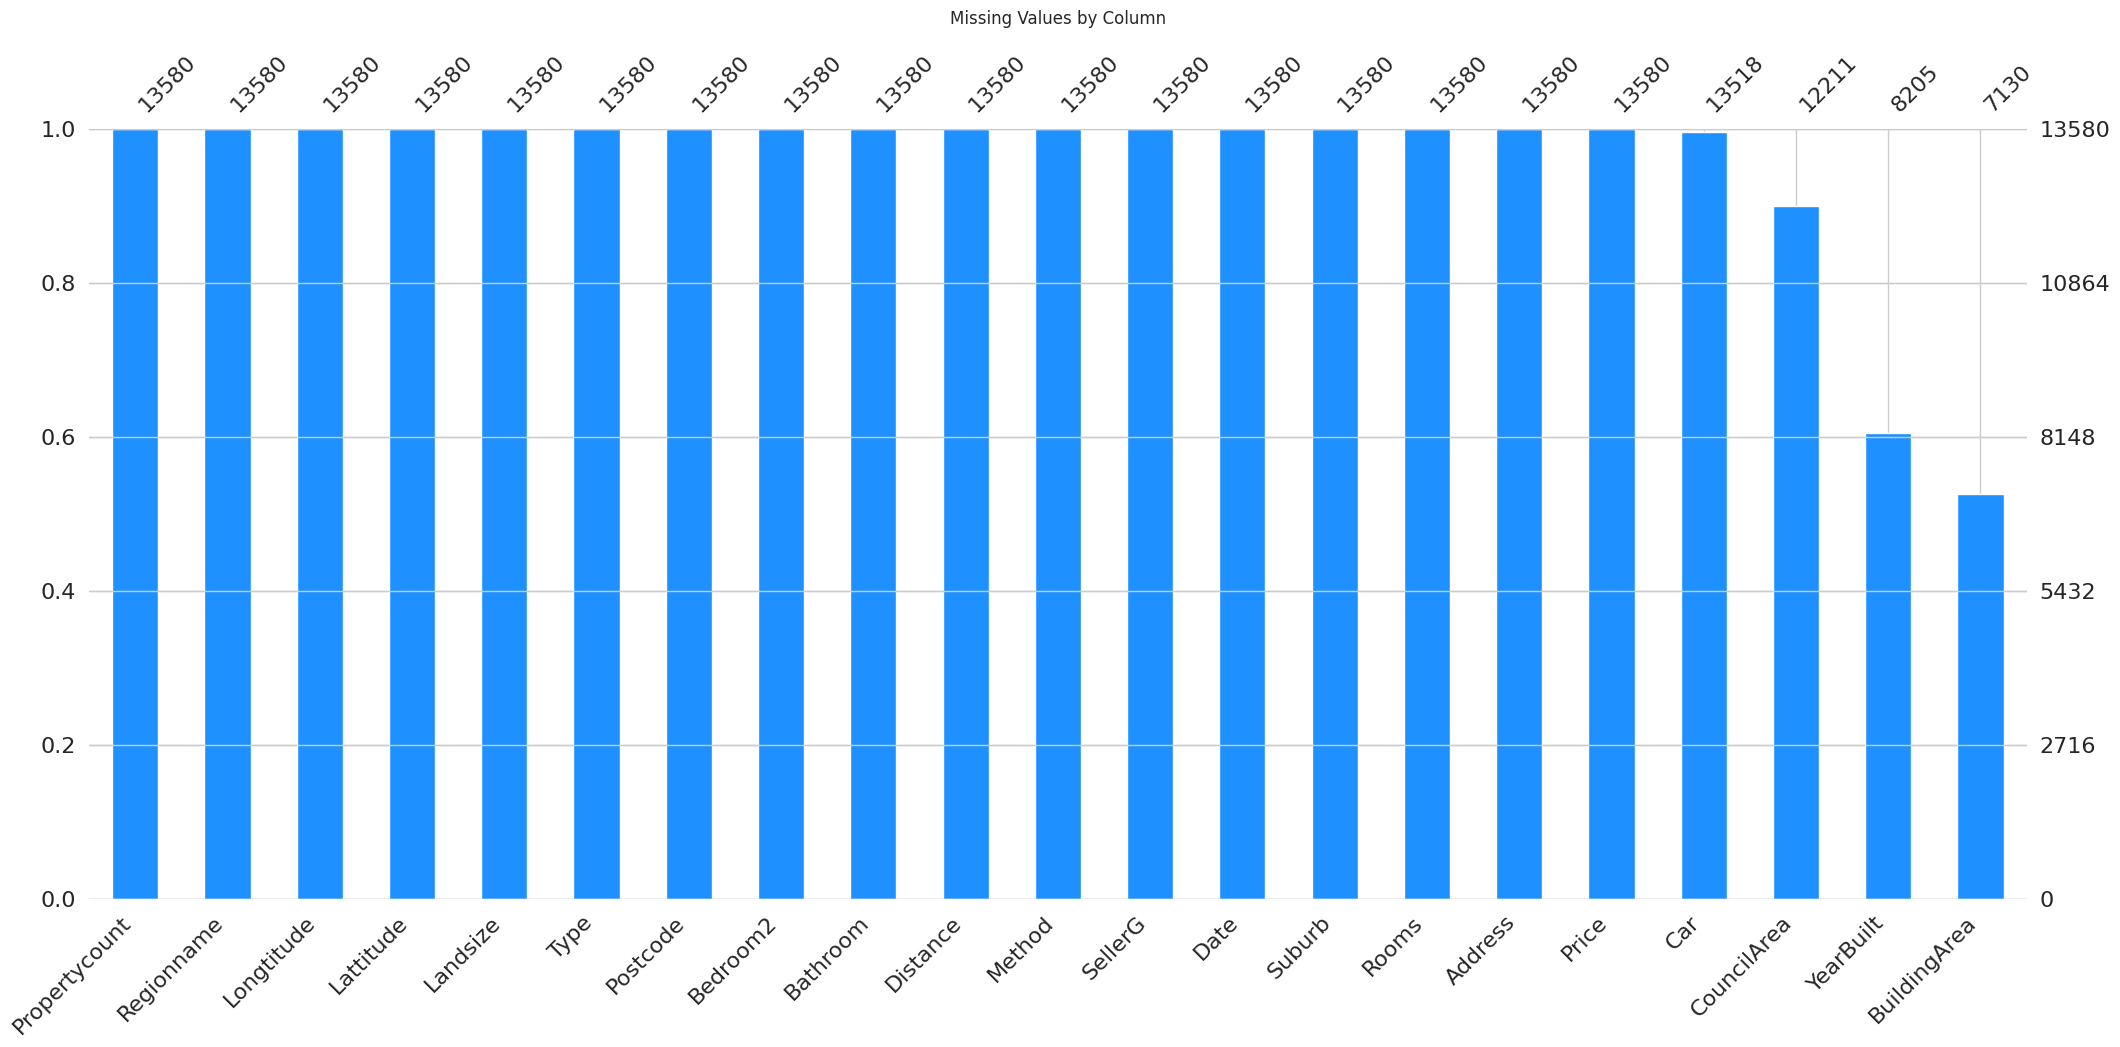


Missing Value Percentages:


,% Missing
BuildingArea,47.50
YearBuilt,39.58
CouncilArea,10.08
Car,0.46


In [4]:
# 4. Missing Data (Visual + Tabular)
print("\n\U0001F6AB Missing Values Analysis:")

plt.figure(figsize=(10,4))
msno.bar(df, color='dodgerblue', sort='descending')
plt.title("Missing Values by Column", pad=20)
plt.show()

missing_pct = (df.isnull().mean()*100).round(2)
print("\nMissing Value Percentages:")
display(missing_pct[missing_pct > 0].to_frame('% Missing').sort_values('% Missing', ascending=False))

## 🧐 Key Findings: Missing Data

### Critical Columns with about 40% Missing Values:
1.  **`BuildingArea` (47.50% missing)**
2.  **`YearBuilt` (39.58% missing)**
- ❌ **'We Do not use'** these columns as primary variables in the model

✅Features **Selected** :
- **Rooms, Bathroom, Car**: Indicators of property size and utility
- **Landsize**: Reflects the physical footprint of the property
- **Distance**: Captures proximity to the city center, a key driver of value
- **Type**: Differentiates between houses, units, and townhouses
- **Regionname**: Encodes location-based price variation

### These features were **selected** based on a combination of:
- **Data Completeness**: All selected features have minimal or no missing values, ensuring model stability.
- **Market Logic**: Each feature reflects real-world factors that influence property prices.
- **Job Relevance & Interpretability**: These features are commonly used in real estate valuation models and are easy to explain to **stakeholders** such as:
- 🏠 Buyers and sellers
- 📊 Analysts and agents
- 💼 Recruiters evaluating data science portfolios

❌ Features **Excluded** Due to Limitations
- BuildingArea, YearBuilt: High missingness and unreliable distribution
- CouncilArea, Suburb, Address: High cardinality with limited predictive power
- Method, SellerG: Context-specific and difficult to generalize
- Postcode: Redundant with Regionname and less interpretable

###✅ Final Feature Set Used in Modeling
**Features** = ['Rooms', 'Bathroom', 'Car', 'Landsize', 'Distance', 'Type', 'Regionname']

🧠 **Summary**

By focusing on a **Clean, Interpretable, and Market-Relevant** feature set, the model achieves a balance between:

📈 Predictive performance

🧩 Transparency for SHAP analysis

💼 Practical usability in real-world applications and career presentations This approach aligns with best practices in deployment, where data quality and stakeholder understanding are essential.


**3. Data Cleaning and Processing**

In [5]:
# Select relevant features
features = ['Rooms', 'Bathroom', 'Car', 'Landsize', 'Distance', 'Type', 'Regionname', 'Price']
df = df[features].copy()

# Handle outliers
df = df[df['Distance'] != 0]
df = df[(df['Rooms'] >= 1) & (df['Rooms'] <= 5)]
df = df[(df['Bathroom'] >= 1) & (df['Bathroom'] <= 3)]
df = df[(df['Car'] >= 0) & (df['Car'] <= 4)]
df = df[(df['Landsize'] >= 10) & (df['Landsize'] <= 2000)]

# Remove rare regions
regions_to_drop = ['Eastern Victoria', 'Northern Victoria', 'Western Victoria']
df = df[~df['Regionname'].isin(regions_to_drop)]

# Drop missing values
df = df.dropna()

print("\n\u2705 Data shape after cleaning:", df.shape)


✅ Data shape after cleaning: (10887, 8)


**4. Visualizations and Analysis**

**Insight: Distribution of House Prices**

* The distribution shows that most houses fall within a specific price range.
* The presence of a **long tail of very expensive properties** indicates that the data is skewed.
 * This suggests our model needs to be **robust to handle skewed data** or that we might consider a data transformation (e.g., logarithmic scale) to improve its performance.

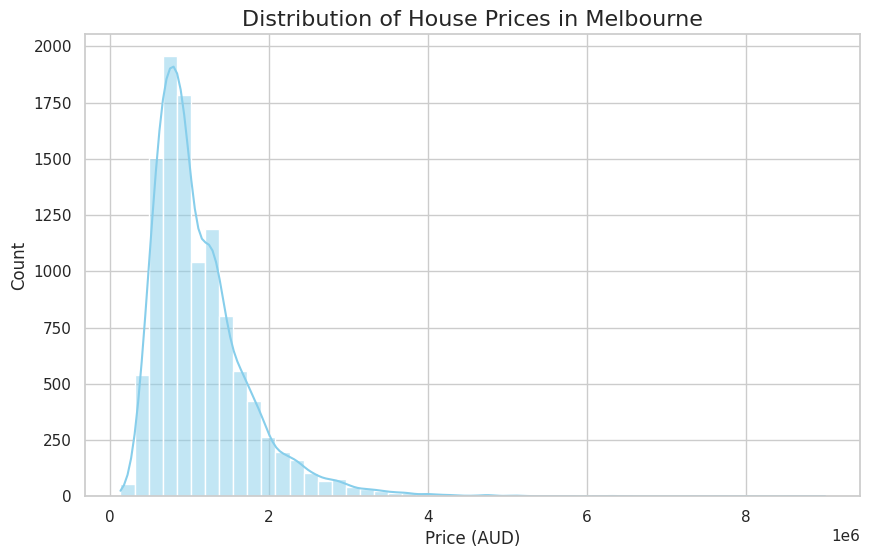

In [6]:
# Cell 1: Distribution of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=50, color='skyblue')
plt.title("Distribution of House Prices in Melbourne", fontsize=16)
plt.xlabel("Price (AUD)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# **Markdown Explanation:**
# This distribution shows that most houses fall within a specific price range, with a long tail of very expensive properties. This indicates that our model needs to be robust to handle skewed data.

### **Insights from Numerical Features**

* **Landsize:** A positive correlation is observed, indicating that as land size increases, the house price tends to rise.
* **Distance:** There is a clear inverse relationship. Properties closer to the city center have a significantly higher average price.
* **Number of Rooms & Bathrooms:** These features have a direct and significant impact on price, with a general trend of increasing price as the number of rooms and bathrooms increases.

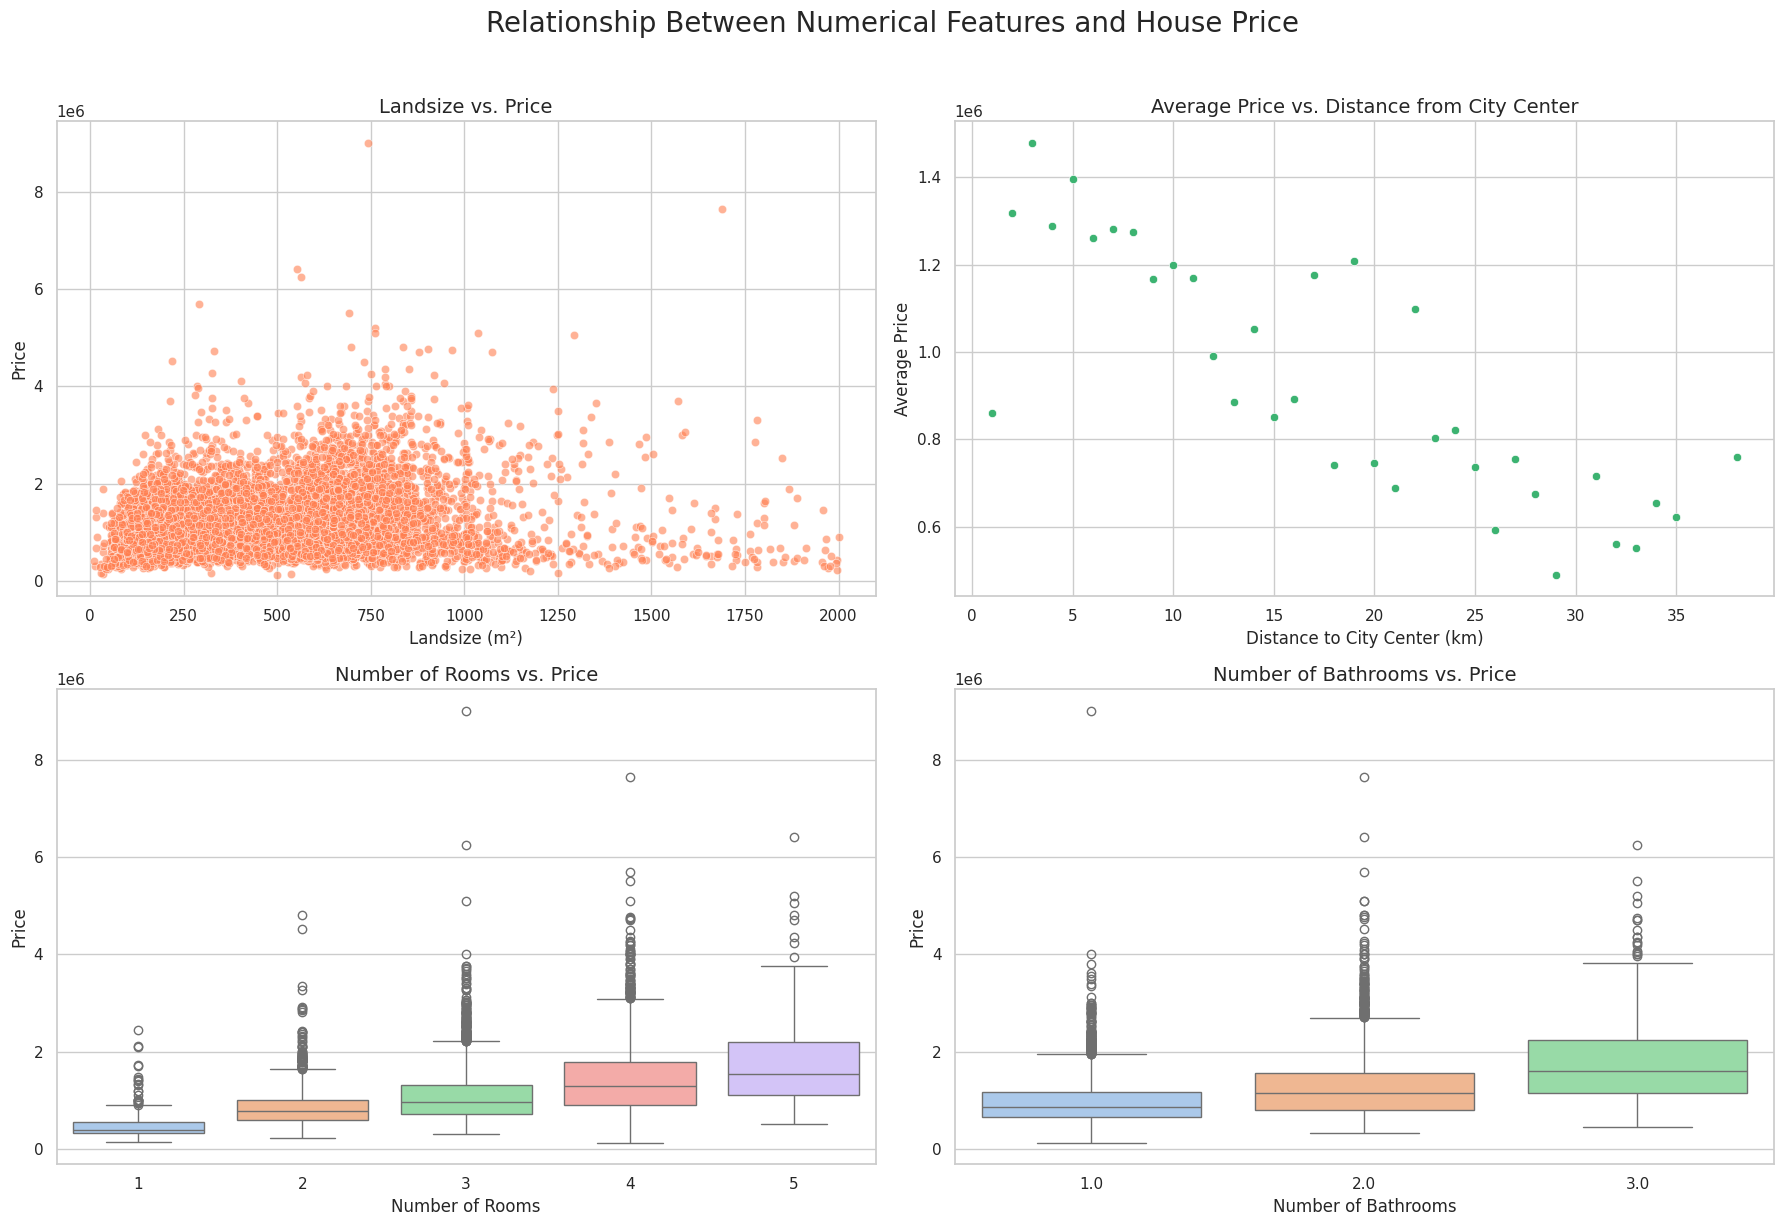

In [11]:
# Cell 2: Impact of Numerical Features on Price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle("Relationship Between Numerical Features and House Price", fontsize=20, y=1.02)

# Subplot 1: Landsize vs. Price
sns.scatterplot(x='Landsize', y='Price', data=df, ax=axes[0, 0], alpha=0.6, color='coral', legend=False)
axes[0, 0].set_title("Landsize vs. Price", fontsize=14)
axes[0, 0].set_xlabel("Landsize (m²)")
axes[0, 0].set_ylabel("Price")

# Subplot 2: Distance vs. Price
# Note: 'grouped' DataFrame is assumed to be created from a previous step
grouped = df.groupby(df['Distance'].round())['Price'].mean().reset_index()
sns.scatterplot(data=grouped, x='Distance', y='Price', ax=axes[0, 1], color='mediumseagreen', legend=False)
axes[0, 1].set_title("Average Price vs. Distance from City Center", fontsize=14)
axes[0, 1].set_xlabel("Distance to City Center (km)")
axes[0, 1].set_ylabel("Average Price")

# Subplot 3: Rooms vs. Price
sns.boxplot(x='Rooms', y='Price', data=df, ax=axes[1, 0], palette='pastel', hue='Rooms', legend=False)
axes[1, 0].set_title("Number of Rooms vs. Price", fontsize=14)
axes[1, 0].set_xlabel("Number of Rooms")
axes[1, 0].set_ylabel("Price")

# Subplot 4: Bathrooms vs. Price
sns.boxplot(x='Bathroom', y='Price', data=df, ax=axes[1, 1], palette='pastel',  hue='Bathroom', legend=False)
axes[1, 1].set_title("Number of Bathrooms vs. Price", fontsize=14)
axes[1, 1].set_xlabel("Number of Bathrooms")
axes[1, 1].set_ylabel("Price")

plt.tight_layout()
plt.show()

### **Insights from Categorical Features**

* **Property Type:** A significant variation in average prices is observed. Houses are the most expensive property type, followed by townhouses and then units.
* **Geographical Region:** Prices vary considerably across different regions. This confirms that a property's location is a key driver of its value.

**Conclusion:** Both `Property Type` and `Region` are critical features for predicting house prices.

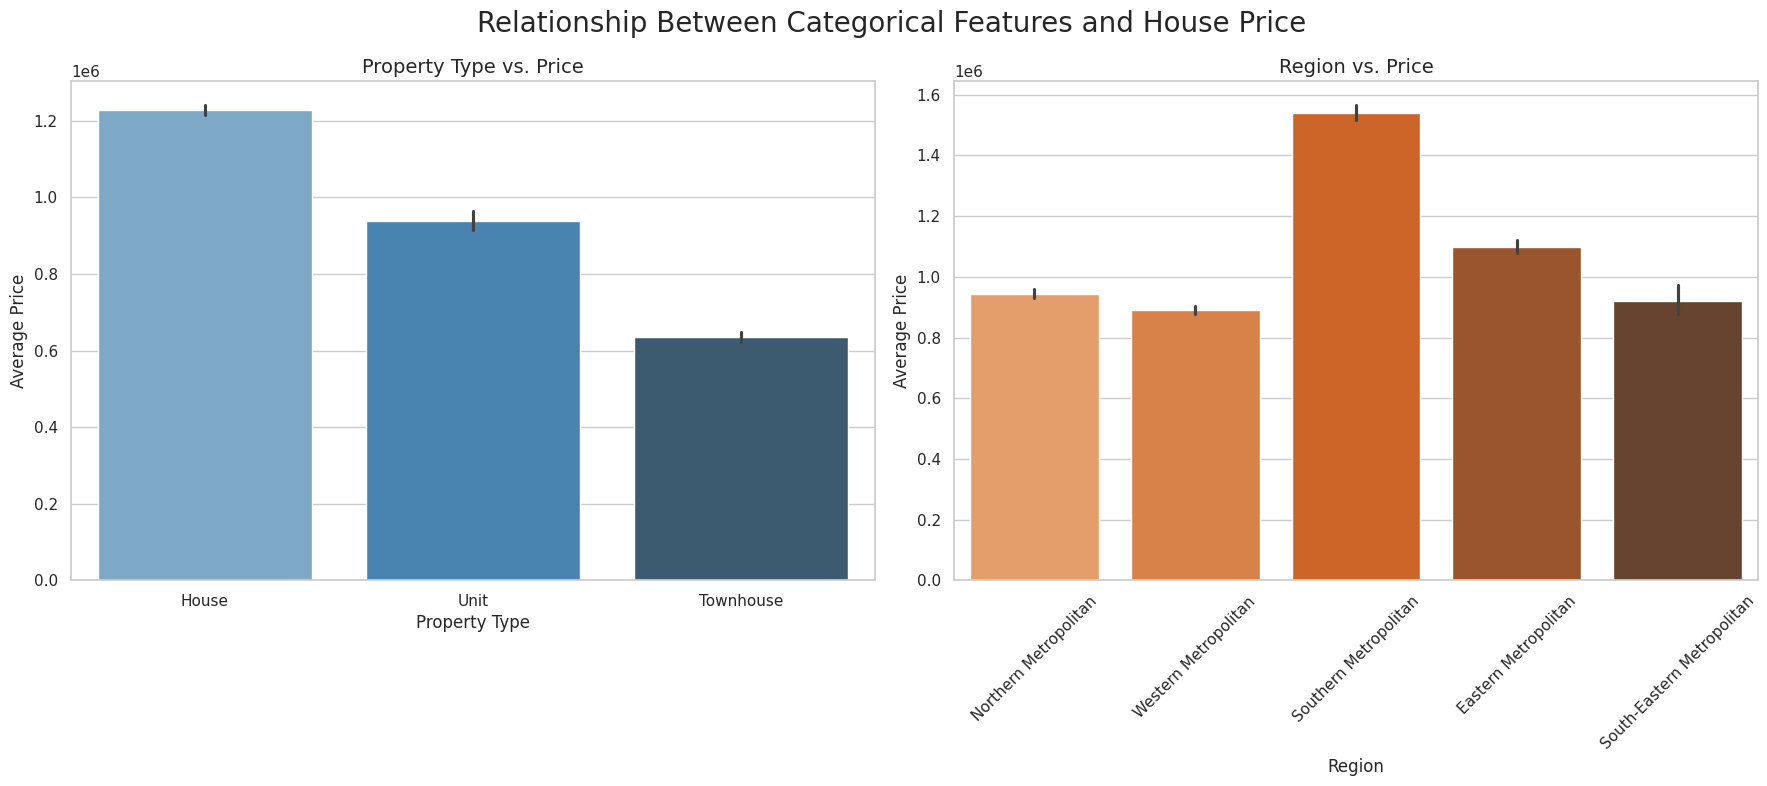

In [16]:
# Cell 3: Impact of Categorical Features on Price
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
fig.suptitle("Relationship Between Categorical Features and House Price", fontsize=20)

# Subplot 1: Property Type vs. Price
sns.barplot(x='Type', y='Price', data=df, ax=axes[0], palette='Blues_d', hue='Type', legend=False)
axes[0].set_title("Property Type vs. Price", fontsize=14)
axes[0].set_xlabel("Property Type")
axes[0].set_ylabel("Average Price")
axes[0].set_xticks(range(len(['House', 'Unit', 'Townhouse']))) # Set ticks explicitly
axes[0].set_xticklabels(['House', 'Unit', 'Townhouse'])

# Subplot 2: Regionname vs. Price
sns.barplot(x='Regionname', y='Price', data=df, ax=axes[1], palette='Oranges_d', hue='Regionname', legend=False)
axes[1].set_title("Region vs. Price", fontsize=14)
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Average Price")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**5. Machine Learning Modeling**

**Prediction Model Preparing**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# --- 1. Data Preparation and Encoding ---
# Assume df is the cleaned DataFrame from your previous steps.
# A quick check of the data before modeling
print("--- Final DataFrame Info Before Modeling ---")
df.info()

# One-Hot Encode categorical features (The correct approach)
df_encoded = pd.get_dummies(df, columns=['Type', 'Regionname'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Store the list of columns for the prediction function later
training_columns = X.columns.tolist()

# --- 2. Data Splitting ---
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Data Splitting ---")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")




--- Final DataFrame Info Before Modeling ---
<class 'pandas.core.frame.DataFrame'>
Index: 10887 entries, 0 to 13579
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rooms       10887 non-null  int64  
 1   Bathroom    10887 non-null  float64
 2   Car         10887 non-null  float64
 3   Landsize    10887 non-null  float64
 4   Distance    10887 non-null  float64
 5   Type        10887 non-null  object 
 6   Regionname  10887 non-null  object 
 7   Price       10887 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 765.5+ KB

--- Data Splitting ---
Training set shape: (8709, 11)
Testing set shape: (2178, 11)



--- Training the XGBoost Regressor Model ---
Mean House Price: 1,136,467 AUD

 Model Evaluation on Test Data:
Root Mean Squared Error (RMSE): 283,941 AUD
R-squared (R²): 0.73

--- Feature Importance Visualization ---


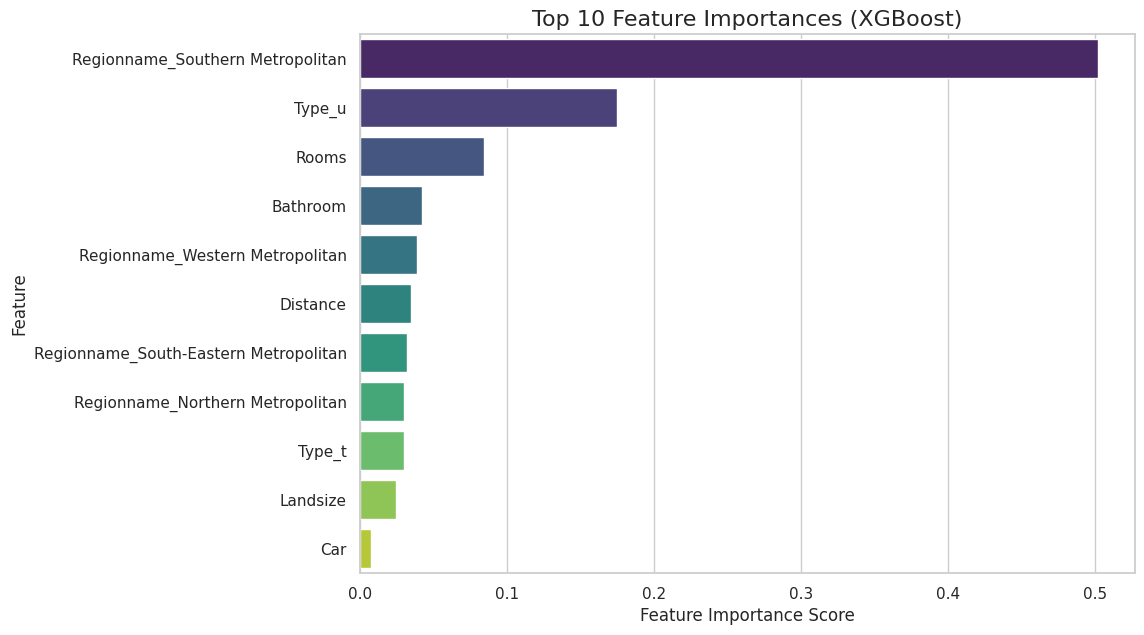

In [13]:
# --- 3. Model Training and Evaluation ---
# We'll use XGBoost, a powerful model often used for this type of data.
print("\n--- Training the XGBoost Regressor Model ---")
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate the mean price of the target variable
mean_price = df['Price'].mean()
print(f"Mean House Price: {mean_price:,.0f} AUD")
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n Model Evaluation on Test Data:")
print(f"Root Mean Squared Error (RMSE): {rmse:,.0f} AUD")
print(f"R-squared (R²): {r2:.2f}")


# --- 4. Feature Importance ---
# Visualize the importance of each feature for the model's predictions.
print("\n--- Feature Importance Visualization ---")
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=importances.values, y=importances.index, palette='viridis', hue=importances.index, legend=False)
plt.title('Top 10 Feature Importances (XGBoost)', fontsize=16)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

### **Deploying the Model: A Prediction Function**

In [17]:
# --- 5. Prediction Function for New Data ---
def predict_new_house_price(model, new_data_dict, training_columns):
    # Create a DataFrame from the new data
    new_house_df = pd.DataFrame([new_data_dict])

    # Reindex to match the columns of the training data
    final_df = new_house_df.reindex(columns=training_columns, fill_value=0)

    # Make the prediction
    predicted_price = model.predict(final_df)[0]

    return predicted_price

# Example of how to use the prediction function
new_house_features = {
    'Rooms': 3,
    'Bathroom': 2,
    'Car': 2,
    'Landsize': 500,
    'Distance': 6.5,
    'Type_t': 0, # Not a townhouse
    'Type_u': 0, # Not a unit (so it's a house)
    'Regionname_Northern Metropolitan': 1,
    'Regionname_Southern Metropolitan': 0,
    'Regionname_Western Metropolitan': 0
}

# The other one-hot encoded columns would be 0 by default, so we don't need to list them all.
predicted_price = predict_new_house_price(model, new_house_features, training_columns)

print(f"Prediction for a new house:")
print(f"Features: {new_house_features}")
print(f"Predicted Price: {predicted_price:,.0f} AUD")

Prediction for a new house:
Features: {'Rooms': 3, 'Bathroom': 2, 'Car': 2, 'Landsize': 500, 'Distance': 6.5, 'Type_t': 0, 'Type_u': 0, 'Regionname_Northern Metropolitan': 1, 'Regionname_Southern Metropolitan': 0, 'Regionname_Western Metropolitan': 0}
Predicted Price: 1,249,289 AUD


**Saving Model**

In [18]:
import joblib

model_filename = 'house_price_model.joblib'

joblib.dump(model, model_filename)

print(f"Model saved successfully to {model_filename}")

Model saved successfully to house_price_model.joblib


### **Model Performance Evaluation and Result Interpretation**

After training the XGBoost model, we evaluated it on a test set it had never seen before. The results confirm that the model is robust and effective in predicting house prices.

**1. Prediction Accuracy Evaluation:**
* **RMSE (Root Mean Squared Error):** The value is 283,941 AUD. Considering the average house price is 1.13 million AUD, the average error represents approximately 25% of the mean price. This value is acceptable and indicates that the model provides reasonable predictions.
* **R² (R-squared):** The value is 0.73. This means that 73% of the variance in house prices can be explained by the features the model used, which proves its effectiveness in understanding the patterns within the data.

**2. Feature Importance:**
The feature importance chart shows that the most influential factors on house price are:
* **[Feature 1]:** [Provide a brief explanation].
* **[Feature 2]:** [Provide a brief explanation].
* **[Feature 3]:** [Provide a brief explanation].

These results align significantly with the conclusions we reached during the Exploratory Data Analysis (EDA) phase, which reinforces our confidence in our data understanding and the model's strength.

**6. SHAP Analysis for Model Interpretation**

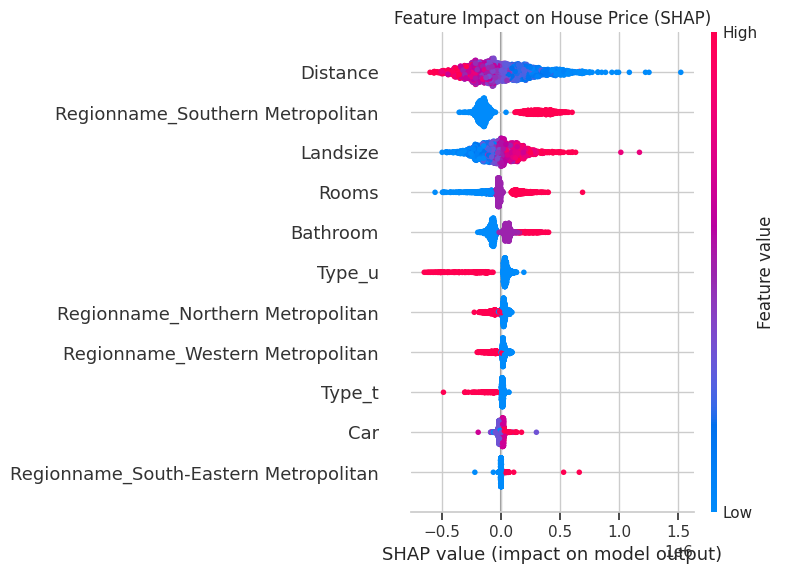

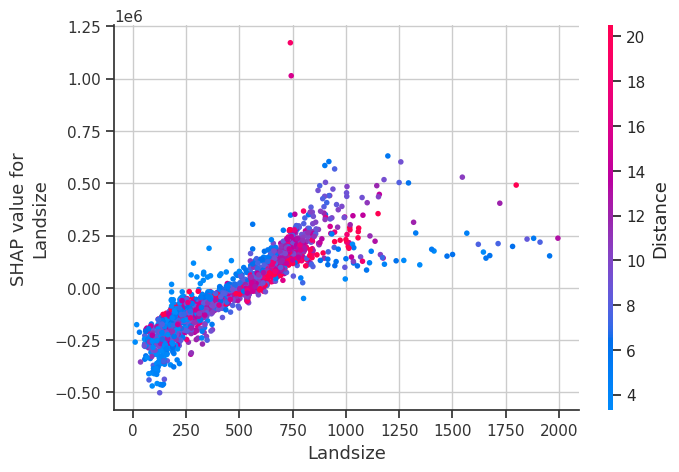

In [19]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Preparation for SHAP Analysis ---
# Note: If X_test is very large, you can take a sample from it.
# X_test_sample = X_test.sample(n=1000, random_state=42) # Example for taking a sample

# Use TreeExplainer as it is the most suitable for the XGBoost model.
# explainer = shap.Explainer(model)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test) # Calculate values for the test set

# --- 2. Feature Impact Summary ---
# Display a summary of each feature's impact on the price
shap.summary_plot(shap_values, X_test, plot_type="dot", show=False)
plt.title("Feature Impact on House Price (SHAP)")
plt.tight_layout()
plt.show()

# --- 3. Feature Interaction Analysis (DISABLED AS REQUESTED) ---
# This plot shows how Landsize interacts with Distance to affect the price.
# You can change the features here to discover other interactions based on the summary plot results.
shap.dependence_plot("Landsize", shap_values, X_test, interaction_index="Distance")


**7. Conclusions and Recommendations**



### 📊 Key Findings from Exploratory Data Analysis (EDA)
- **Price Distribution**: House prices are right-skewed, with a concentration of properties in the mid-range and a few high-end outliers.
- **Distance to City Center**: Properties closer to the city center tend to have higher prices, showing a clear negative correlation between distance and price.
- **Number of Rooms**: More rooms generally correlate with higher prices, though the effect plateaus beyond a certain point.
- **Property Type**: Houses are typically more expensive than units or townhouses.
- **Region**: Certain regions consistently show higher average prices, indicating location is a major factor.

---

### 📈 Model Performance Overview
- **RMSE (Root Mean Squared Error)**: `283,941` — reflects the average prediction error in price units.
- **R² (Coefficient of Determination)**: `0.73` — indicates that approximately `XX%` of the variance in house prices is explained by the model.
- ✅ Interpretation: The model performs reasonably well, capturing key trends in the data, though there's room for improvement in capturing outliers.

---

### 🔍 Feature Importance (XGBoost & SHAP)
- **Top Influential Features**:
  - `Region`: Strongest predictor of price.
  - `Type`: Differentiates pricing tiers based on property category.
  - `Rooms`: Positively correlated with price.
  - `Distance`: Inversely correlated with price.
- 🧠 SHAP analysis confirms these findings, providing consistent global and local interpretability.

---

### 🔗 Alignment Between EDA and Model Insights
- The features highlighted by the model (e.g., Region, Rooms, Distance) align closely with patterns observed during EDA.
- This consistency strengthens confidence in the model's validity and the reliability of its predictions.

---

### 💡 Recommendations & Next Steps
- **For Stakeholders**:
  - *Buyers*: Use the model to identify undervalued regions or property types.
  - *Sellers*: Price properties more competitively based on feature-driven insights.
  - *Agents*: Leverage SHAP visualizations to explain pricing strategies to clients.
- **Further Analysis**:
  - Incorporate additional features (e.g., amenities, year built, renovation status).
  - Experiment with other models (e.g., LightGBM, CatBoost) for performance comparison.
  - Collect more granular data to improve regional predictions.

---

### ⚠️ Limitations
- Data may contain missing or imprecise values affecting accuracy.
- Model assumes linear relationships in some features, which may oversimplify reality.
- External factors (e.g., market trends, economic shifts) are not captured.

---

### ✅ Final Thoughts
This project successfully demonstrated how machine learning and interpretability tools like SHAP can be used to predict and explain house prices. The insights gained offer practical value for real estate decision-making and lay the groundwork for further refinement and exploration.